# Modèle évolutionnaire

In [1]:
import numpy as np 
import random 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
N= 400
z= 0.06 #proportion d'informé
N_inf = int(N*z)
p= 0.6
z2= 0.4# proportion initiale de dandy parmis les suiveurs
m= 6
g= 0.7 #coeff de memoire
a= 0.7 #coeff d'originalité
taux= 0.05

## Population

On initialise la population de départ. Il existe 3 types d'individus : "informed", "dandy et "conformist" codés par un génome caractéritique.

In [3]:
def init_popu(N,z,z2):
    population = []
    N_inf = int (N*z)
    N_ddy = int((N-N_inf)*z2)
    for i in range (N_inf):
        population.append(["I",0])
    for i in range (N_inf, N_inf+N_ddy):
        population.append(["F",a])
    for i in range (N_inf+N_ddy, N):
        population.append(["F",0])
    return population

In [25]:
population =init_popu(N, z, z2)
population

[['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['I', 0],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 ['F', 0.7],
 

## Prédictions/Résultats

On initialise les résultats prédits par les "Informed" et les "Followers", les premiers avec une probabilité p de prédire correctement et les seconds avec une probabilité de 0.5

Puis la fonction new_resultat permet de retourner les predictions des "Informed" de la meme manière qu'à l'initialisation et des "Followers" qui adoptent l'opinion majoritaire de leur réseau.

In [4]:
def init_result(N):
    l_inf = np.random.choice([-1,1],size=N_inf,p=[1-p,p])
    l_suiv = np.random.choice([-1,1],size=N-N_inf,p=[0.5,0.5])
    return np.concatenate((l_inf,l_suiv))

In [6]:
resultat = init_result(N)

resultat

array([ 1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,
        1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,
        1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,
        1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,
       -1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,
        1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,
        1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,
        1,  1,  1, -1,  1

In [5]:
def new_resultat(resultat, Mat_network):
    l_inf = np.random.choice([-1,1],size=N_inf,p=[1-p,p])
    l_suiv=[]
    for i in range (N_inf, len(Mat_network)):
        for j in Mat_network[i]:
            s=0
            s+=resultat[j]
        if s>0:
            l_suiv.append(1)
        else:
            l_suiv.append(-1)
    l_suiv2= np.array(l_suiv)
    return np.concatenate((l_inf,l_suiv2))

In [13]:
new_resultat(resultat,Mat_network)

array([-1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,
        1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,
        1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,
       -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,
        1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
        1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,
       -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,
        1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,
       -1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1

## Matrices de reseaux

Chaque "followers" a un reseau de m individus et il prendra la décision majoritaire de ces m individus.

On initialise donc la matrice de reseaux. Les "Informed" n'ont pas de reseau puisqu'indépendants donc ils se verront attribuer un reseau composé de N+1 par convention.

Puis la fonction new_network actualise le reseau de chaque followers : le membre du reseau ayant le plus faible score est retiré et remplacé par un individu choisi en étant pondéré par son score

In [6]:
def init_Network(N,m):
    N_inf = int(N*z)
    Mat_net = [[N+1 for k in range(m)]for i in range(N_inf)]
    pool = [i for i in range(N)]
    for i in range(N_inf, N):
        l= random.sample(pool[:i]+pool[i+1:],m)
        Mat_net.append(l)
    return Mat_net

In [11]:
Mat_network= init_Network(N,m)
Mat_network
#ici dans une population on a un "40 informed" et par exemple 186, 96, 281, 25, 311 et 193 font partie du réseau de l'individu 40

[[401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401, 401, 401, 401, 401],
 [401, 401

In [7]:
def new_network1(Mat_net, Score):
    ponder1= np.copy(Score[1])
    liste_choix = [s for s in range(N)]
    M= np.copy(Mat_net)
    for k in range(N_inf,N):
        ponder2 = np.copy(Score[1])
        l2=[]
        for i in M[k]:
            l2.append(ponder1[i])
            ponder2[i]= 0
        i_min = l2.index(min(l2))
        j = random.choices(liste_choix, weights= ponder2, k=1)
        M[k][i_min]= j[0]
    return M

## Scores

A chaque individu i dans le réseau de j on lui attribue un score S_ij. Le score total de i sera la somme des S_ij qu'on normalisera. Les scores ne sont pas calculé de la même facon si j est un "conformist" ou un dandy". Cependant dans ce modèle le scoring est simplifié, on n'a pas la variable "omega" de popularité ni "c" le côut d'information pour un "informed".

En premier lieu, on initialise les scores et ensuite la fonction new_score permet de calculer le score de chacun suite au changement de reseaux des "followers".

In [8]:
def init_scores(Mat_net,res) :
    S= np.zeros((N,N))
    S2=[]
    for i in range(N):
        for j in range (N_inf, N):
            if i in Mat_net[j] and res[i]==1:
                S[i][j]=1
    for i in range (N):
        S2.append(sum(S[i]))
        S3= S2/np.sum(S2)
    return S, S3

In [23]:
Score = init_scores(Mat_network, resultat) 

In [16]:
def new_score(S,res,Mat_net,population):
    S1 = S[0]
    N_Score= np.copy(S1)
    S2= []
    for i in range(N):
        R=0
        if res[i]==1:
            R=1
        for j in range (N_inf, N):
            if i in Mat_net[j] : #si i est dans le reseau de j
                if population[j][1]==0: 
                    N_Score[i][j]= (1-g)*S1[i][j]+R
                if population[j][1]==a:
                    R_m = list(res).count(1)/m
                    N_Score[i][j]= (1-g)*S1[i][j]+R+ a*np.abs(R-R_m)
        S2.append(sum(N_Score[i]))
    S3= S2/np.sum(S2)
    return N_Score, S3               

## Mutation

Certains conformistes peuvent devenir dandy et inversement avec une probabilité de "taux" grâce à la fonction mutationPopulation

In [10]:
def mutation(individu, taux):
    if(random.random() < taux):
        if individu[1] == a:
            individu[1] = 0   
        else :
            individu[1] = a
    return individu

def mutationPopulation(population, taux):
    Pop_mutee = []
    
    for i in range(0, len(population)):
        indiv = mutation(population[i], taux)
        Pop_mutee.append(indiv)
    return Pop_mutee

## Aggrégation des fonctions pour suivre l'évolution de la population

In [17]:
def nouvelle_generation(resultat, Mat_network, Score, population):
    result = new_resultat(resultat,Mat_network)
    fitness= new_score(Score,result,Mat_network,population)
    Mat_net = new_network1(Mat_network, fitness)
    popu = mutationPopulation(population, taux)
    return result, fitness, Mat_net, popu

In [18]:
def evolution_res(t):
    population = init_popu(N,z,z2)
    resultat = init_result(N)
    Mat_network =init_Network(N,m)
    Score = init_scores(Mat_network,resultat)
    res_fin_inf=[]
    res_pop =[]
    
    for k in range (t):
        nouv_gener = nouvelle_generation(resultat, Mat_network, Score, population)
        resultat = nouv_gener[0]
        Score = nouv_gener[1]
        Mat_network = nouv_gener[2]
        population = nouv_gener[3]
        res_fin_inf.append(resultat)
        res_pop.append(population)
    
    return res_fin_inf,res_pop

In [41]:
def visu(reso):
    reso1=reso[0]
    reso2=reso[1]
    t= np.shape(reso1)[0]
    res_fin_inf=[]
    res_fin_confo= []
    res_fin_ddy= []
    
    for k in range(t) :
        res_fin_inf.append(list(reso1[k][:N_inf]).count(1)/N_inf)
        c_conf=0
        N_conf =0
        c_ddy=0
        for j in range(N_inf,N):
            if reso2[k][j][1]==0:
                N_conf+=1
                if reso1[k][j]==1:
                    c_conf+=1
            if reso2[k][j][1]==a and reso1[k][j]==1:
                c_ddy+=1
        res_fin_confo.append(c_conf/N_conf)
        res_fin_ddy.append(c_ddy/(N-N_conf))
    
    X= np.arange(0,200)
    
    plt.figure(figsize=(20,8))
    plt.scatter(X,res_fin_inf,color = 'red', label ="informed", marker = "+")
    plt.scatter(X,res_fin_confo,color = 'blue',label ="conformist", marker = "+")
    plt.scatter(X,res_fin_ddy,color = 'black',label ="dandy", marker = "+")
    plt.legend()
    plt.xlabel("temps")
    plt.ylabel("accuracy")

In [21]:
reso = evolution_res(200)

<ipython-input-8-1027f9d33c7e>:10: RuntimeWarning: invalid value encountered in true_divide
  S3= S2/np.sum(S2)


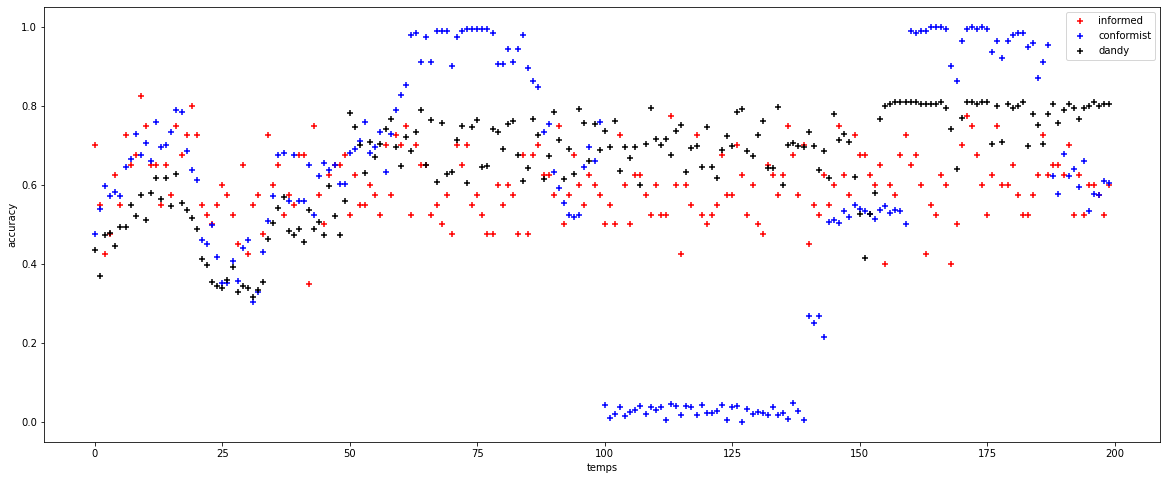

In [42]:
visu(reso)